# Project 7: Statistical Analysis and Hypothesis Testing

## Packages and setup

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [ ]:
#Read data using pandas
user_df=pd.read_csv("cookie_cats.csv")

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
user_df.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [ ]:
#Check for any missing values in the data using isnull() function
user_df.isnull().sum()


userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

### Q1.2 Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

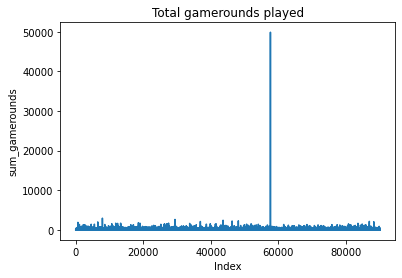

In [ ]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

In [ ]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier

# We are finding the outlier using max() function
outlier = user_df['sum_gamerounds'].max()

# Based on the value of the outlier, we are going to find its index
outlier_index = user_df[user_df['sum_gamerounds'] == outlier].index[0]

# Printing the value of the outlier with its index
print('Value of the outlier is: ', outlier)
print('')
print('Index of the outlier is: ', outlier_index)

# Using drop() function, we are going to remove the outlier using its index
user_df.drop(outlier_index, axis=0, inplace=True)

Value of the outlier is:  49854

Index of the outlier is:  57702


Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

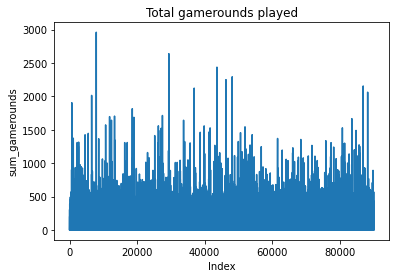

In [ ]:
#Plot the graph for sum_gamerounds player after removing the outlier
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)



## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [ ]:
#Insert calculation for 7-day retention rate

retention_rate_7 = round(user_df['retention_7'].sum() / user_df.shape[0] * 100, 2)
print("Overal 7 days retention rate of the game for both versions is: " ,retention_rate_7,"%")


Overal 7 days retention rate of the game for both versions is:  18.61 %


### Q2.2 How many players never played the game after installing? 

In [ ]:
# Find number of customers with sum_gamerounds is equal to zero
user_df[user_df['sum_gamerounds'] == 0].shape[0]


3994

### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

Text(0.5, 1.0, 'Count of Players vs Sum Gamerounds')

Text(0.5, 0, 'Gamerounds')

Text(0, 0.5, 'Count of Players')

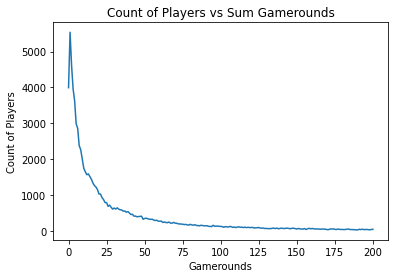

In [ ]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
#Use plot() function on the summarized stats to visualize the chart
game_df = user_df[user_df['sum_gamerounds'] <= 200].groupby(['sum_gamerounds'])['userid'].count()
plt.plot(game_df)
plt.title('Count of Players vs Sum Gamerounds')
plt.xlabel('Gamerounds')
plt.ylabel('Count of Players')

## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [ ]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


<mark>__Analsysis Results:__
    
Users playing the gate_30 version are having retention rate more than the users with gate_40 version. We still have to statistically validate these numbers. However, irrespective of the version 80% of the users have stopped playing the game in under 7 days.  

### Q3.2 Gamerounds summary for different game versions

In [ ]:
#use pandas group by to calculate average game rounds played summarized by different versions
user_df.groupby(['version']).agg({'sum_gamerounds' : 'mean'})



,sum_gamerounds
version,
gate_30,51.342111
gate_40,51.298776


<mark>__Analsysis Results:__
    
Do total number of gamerounds played in total by each player differ based on  different versions of the game? 

Yes, they differ but marginally. gate_30 is having higher gamerounds average thatn gate_40 version.

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [ ]:
#Define A/B groups for hypothesis testing
user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")
group_A=pd.DataFrame(user_df[user_df.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(user_df[user_df.version=="B"]['sum_gamerounds'])

### Q4.1 Shapiro test of Normality

In [ ]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

#test for group_A
shapiro(group_A)

#test for group_B
shapiro(group_B)

(0.48864424228668213, 0.0)

(0.48256540298461914, 0.0)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Analyze and interpret the results of shapiro test of normality i.e. are the two groups normally distributed?

P_value when less than the alpha value of 0.05, we can with 95% confidence level, reject the null hypothesis. Therefore, we can conclude that distributions are not normal.

### Q4.2 Test of homegienity of variance

In [ ]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results
from scipy.stats import levene
levene(group_A['sum_gamerounds'], group_B['sum_gamerounds'])



LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of Levene's test.

As per the levene's test, as the p_value is more than 0.05 alpha value, we fail to reject the null hypothesis. Therefore, two groups do have equal variances.

### Q4.3 Test of significance: Two sample test

In [ ]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis
stats.mannwhitneyu(group_A['sum_gamerounds'], group_B['sum_gamerounds'])



MannwhitneyuResult(statistic=1009027049.5, pvalue=0.02544577639572688)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of two sample hyothesis testing.

As the p_value is less than 0.05, we can conclude with rejecting the null hypothesis and say that, two samples are different.

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [ ]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function
user_df[['version', 'retention_1', 'retention_7']].groupby(['version']).agg('mean')



,retention_1,retention_7
version,,
A,0.448198,0.190183
B,0.442283,0.182000


<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation to the company regarding which level works best as the first gate  - Level 30 or Level 40

As we found out that the two groups are statistically different, we can see that version A which is gate_30 version is having better retention rate for both 1 day and 7 days. So, it is suggested that company should keep going with the gate_30 version as it increase chances of revenue for the company.

## Q6. [Bonus Question]  Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

Text(0.5, 1.0, 'retention_1')

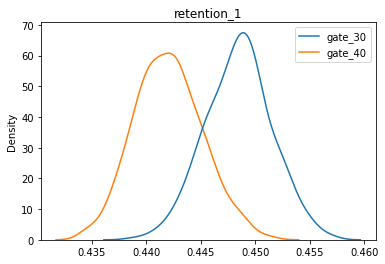

Text(0.5, 1.0, 'retention_7')

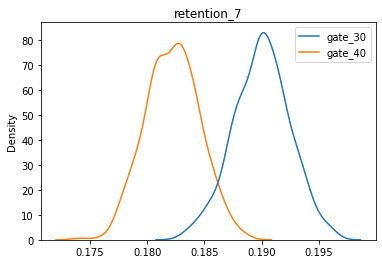

In [ ]:
#Hint: Plot density function

retain_1 = []
retain_7 = []

for i in range(500):                                                            # Appending mean values of both groups to list after resampling.
  sample_df_1 = user_df.sample(frac=0.6, replace=True)
  sample_means_1 = sample_df_1.groupby('version')['retention_1'].mean()
  retain_1.append(sample_means_1.values)


for i in range(500):
  sample_df_7 = user_df.sample(frac=0.6, replace=True)
  sample_means_7 = sample_df_7.groupby('version')['retention_7'].mean()
  retain_7.append(sample_means_7.values)


# # Making dataframes for above lists
retain_1_df = pd.DataFrame(retain_1, columns=['gate_30', 'gate_40'])            # gate_30, gate_40 for version A and B respectively.
retain_7_df = pd.DataFrame(retain_7, columns=['gate_30', 'gate_40'])

# Making density plots to show the distribution for retention_1
sns.kdeplot(data=retain_1_df)
plt.title('retention_1')
plt.show()

# Making density plots to show the distribution for retention_7
sns.kdeplot(data=retain_7_df)
plt.title('retention_7')
plt.show()